In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 2

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/19 [>.............................] - ETA: 8s - loss: 0.8724 - accuracy: 0.4297
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 1s 14ms/step - loss: 0.7679 - accuracy: 0.5039 - val_loss: 0.6803 - val_accuracy: 0.5620
Epoch 2/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.7214 - accuracy: 0.5234
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5655 - val_loss: 0.6369 - val_accuracy: 0.6757
Epoch 3/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6094
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.5991 - val_loss: 0.5970 - val_accuracy: 0.7468
Epoch 4/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.6189 - accuracy: 0.6484


 1/19 [>.............................] - ETA: 0s - loss: 0.3343 - accuracy: 0.8203
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.8565 - val_loss: 0.1368 - val_accuracy: 0.9638
Epoch 29/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.3018 - accuracy: 0.8672
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.2904 - accuracy: 0.8776 - val_loss: 0.1318 - val_accuracy: 0.9690
Epoch 30/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8984
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.8789 - val_loss: 0.1263 - val_accuracy: 0.9690
Epoch 31/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8516
Epoch 31

 1/19 [>.............................] - ETA: 0s - loss: 0.1888 - accuracy: 0.9062
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.2300 - accuracy: 0.9039 - val_loss: 0.0772 - val_accuracy: 0.9858
Epoch 56/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.2118 - accuracy: 0.8984
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.8996 - val_loss: 0.0775 - val_accuracy: 0.9832
Epoch 57/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.2081 - accuracy: 0.8906
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.8940 - val_loss: 0.0772 - val_accuracy: 0.9858
Epoch 58/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8516
Epoch 58

 1/19 [>.............................] - ETA: 0s - loss: 0.2570 - accuracy: 0.8828
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.1947 - accuracy: 0.9185 - val_loss: 0.0611 - val_accuracy: 0.9910
Epoch 83/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.1777 - accuracy: 0.9141
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.2091 - accuracy: 0.9190 - val_loss: 0.0613 - val_accuracy: 0.9884
Epoch 84/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.2032 - accuracy: 0.8984
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.1917 - accuracy: 0.9233 - val_loss: 0.0613 - val_accuracy: 0.9897
Epoch 85/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.1279 - accuracy: 0.9609
Epoch 85

 1/19 [>.............................] - ETA: 0s - loss: 0.1847 - accuracy: 0.9531
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.1802 - accuracy: 0.9220 - val_loss: 0.0607 - val_accuracy: 0.9910
Epoch 110/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.1774 - accuracy: 0.9297
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.2066 - accuracy: 0.9078 - val_loss: 0.0628 - val_accuracy: 0.9897
Epoch 111/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.1940 - accuracy: 0.9219
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.1877 - accuracy: 0.9284 - val_loss: 0.0609 - val_accuracy: 0.9897
Epoch 112/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.1588 - accuracy: 0.9531
Ep

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9858


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 73ms/step
[0.01032846 0.98967147]
1


# 混同行列

25/25 [==============================] - 0s 1ms/step


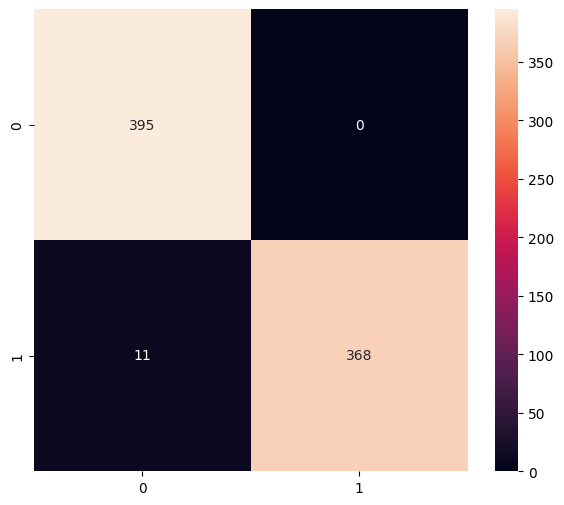

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       395
           1       1.00      0.97      0.99       379

    accuracy                           0.99       774
   macro avg       0.99      0.99      0.99       774
weighted avg       0.99      0.99      0.99       774



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\vision\AppData\Local\Temp\tmplcmvdayd\assets


6456

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.01032845 0.98967147]
1
